In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# Read in csv file

csv1 = "1900_thru_1950.csv"
csv2 = "1951_thru_2021.csv"

data1 = pd.read_csv(csv1)
data2 = pd.read_csv(csv2)

In [3]:
# Create dataframes of raw precipitation data

data1_df = pd.DataFrame(data1)

data1_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-01,2.50,"1,,,0"
1,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-02,3.16,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-03,3.23,",,,0"
3,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-04,4.11,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
30264,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-11,3.04,",,,6"
30265,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-12,1.65,",,,6"
30266,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-01,NaN,NaN
30267,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-02,4.80,",,,6"


In [4]:
data2_df = pd.DataFrame(data2)

data2_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-04,6.43,",,,N"
1,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-05,2.54,",,,N"
2,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-06,4.99,",a,,N"
3,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-07,7.11,",,,N"
4,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-08,6.04,",,,N"
...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-11,6.64,"2,,,N"
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-12,5.57,"1,,,N"
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-01,3.96,"3,,,N"
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-02,10.81,",,,N"


In [5]:
# Merge dataframes on "Station" column

raw_prec_df = pd.concat([data1_df,data2_df])

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0"
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0"
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N"
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N"
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N"
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N"


In [6]:
# Split month and year in "DATE" column

year_and_month_df = raw_prec_df["DATE"].str.split(pat="-", expand=True)

year_and_month_df

,0,1
0,1949,01
1,1949,02
2,1949,03
3,1949,04
4,1949,05
...,...,...
109488,2020,11
109489,2020,12
109490,2021,01
109491,2021,02


In [7]:
# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})

In [8]:
# Add "YEAR" column to raw_prec_df

raw_prec_df["YEAR"] = year_and_month_df["YEAR"]

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0",1949
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0",1949
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0",1949
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0",1949
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0",1949
...,...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N",2020
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N",2020
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N",2021
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N",2021


In [9]:
# Group data by year

#print(raw_prec_df["YEAR"].unique())

prec_groupby_year = raw_prec_df.groupby("YEAR")

In [10]:
# Use sum method to calculate total measured precipitation by year

sum_annual_prec = prec_groupby_year["PRCP"].sum()

sum_annual_prec

YEAR
1900      931.32
1901     1125.84
1902      839.29
1903     1209.43
1904     1141.03
          ...   
2017    16936.31
2018    23750.74
2019    18407.73
2020    25031.78
2021     5208.72
Name: PRCP, Length: 122, dtype: float64

In [11]:
# Reset index

sum_annual_prec = sum_annual_prec.reset_index()

In [12]:
# Convert total annual measured precipitation to dataframe

sum_annual_prec_df = pd.DataFrame(sum_annual_prec)

#total_annual_prec_df.DATE.replace({"-02": ""}, regex=True)

#total_annual_prec_df

In [13]:
#total_annual_prec_df.dtypes

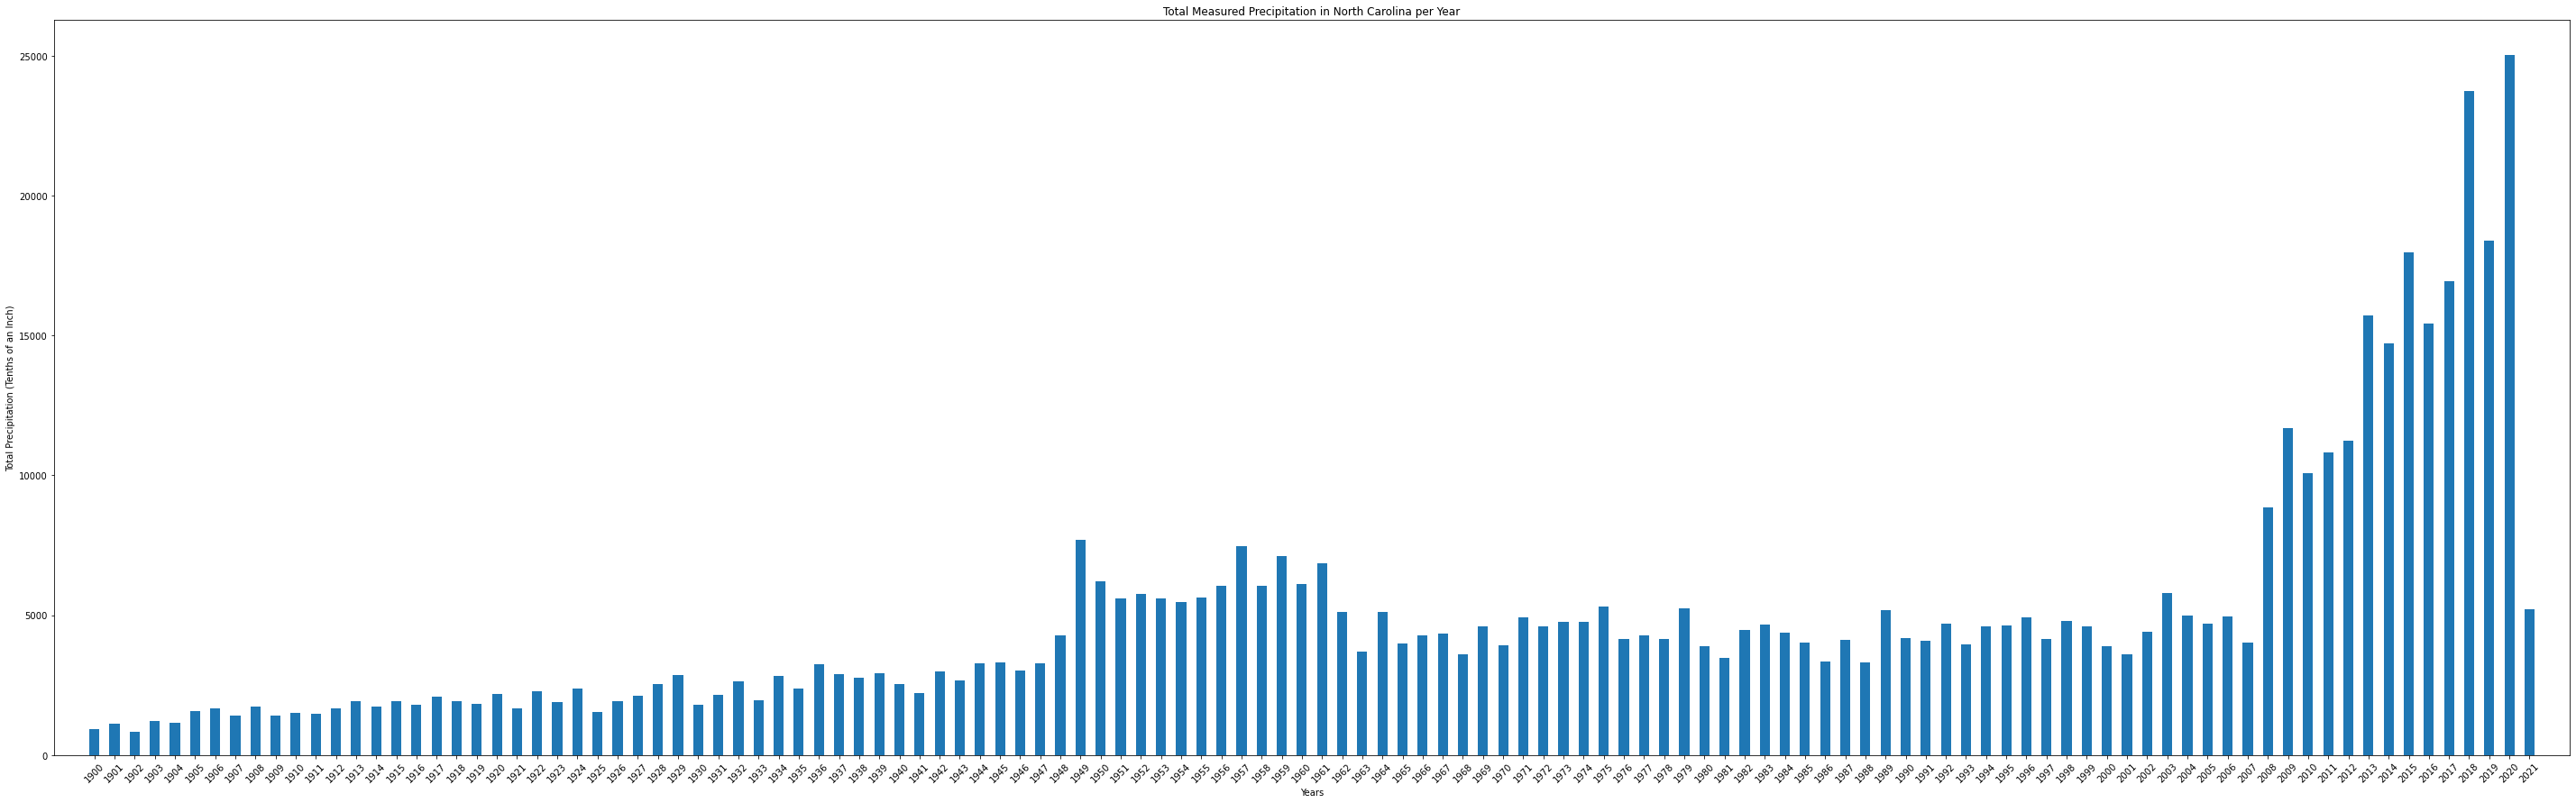

In [14]:
# Plot bar graph

bar_prec = sum_annual_prec_df.plot(kind="bar", figsize = (50,15), legend=False)

plt.title("Total Measured Precipitation in North Carolina per Year")

bar_prec.set_xticklabels(sum_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.xlim(-2, 123)

plt.show()

In [15]:
# matplotlib available styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


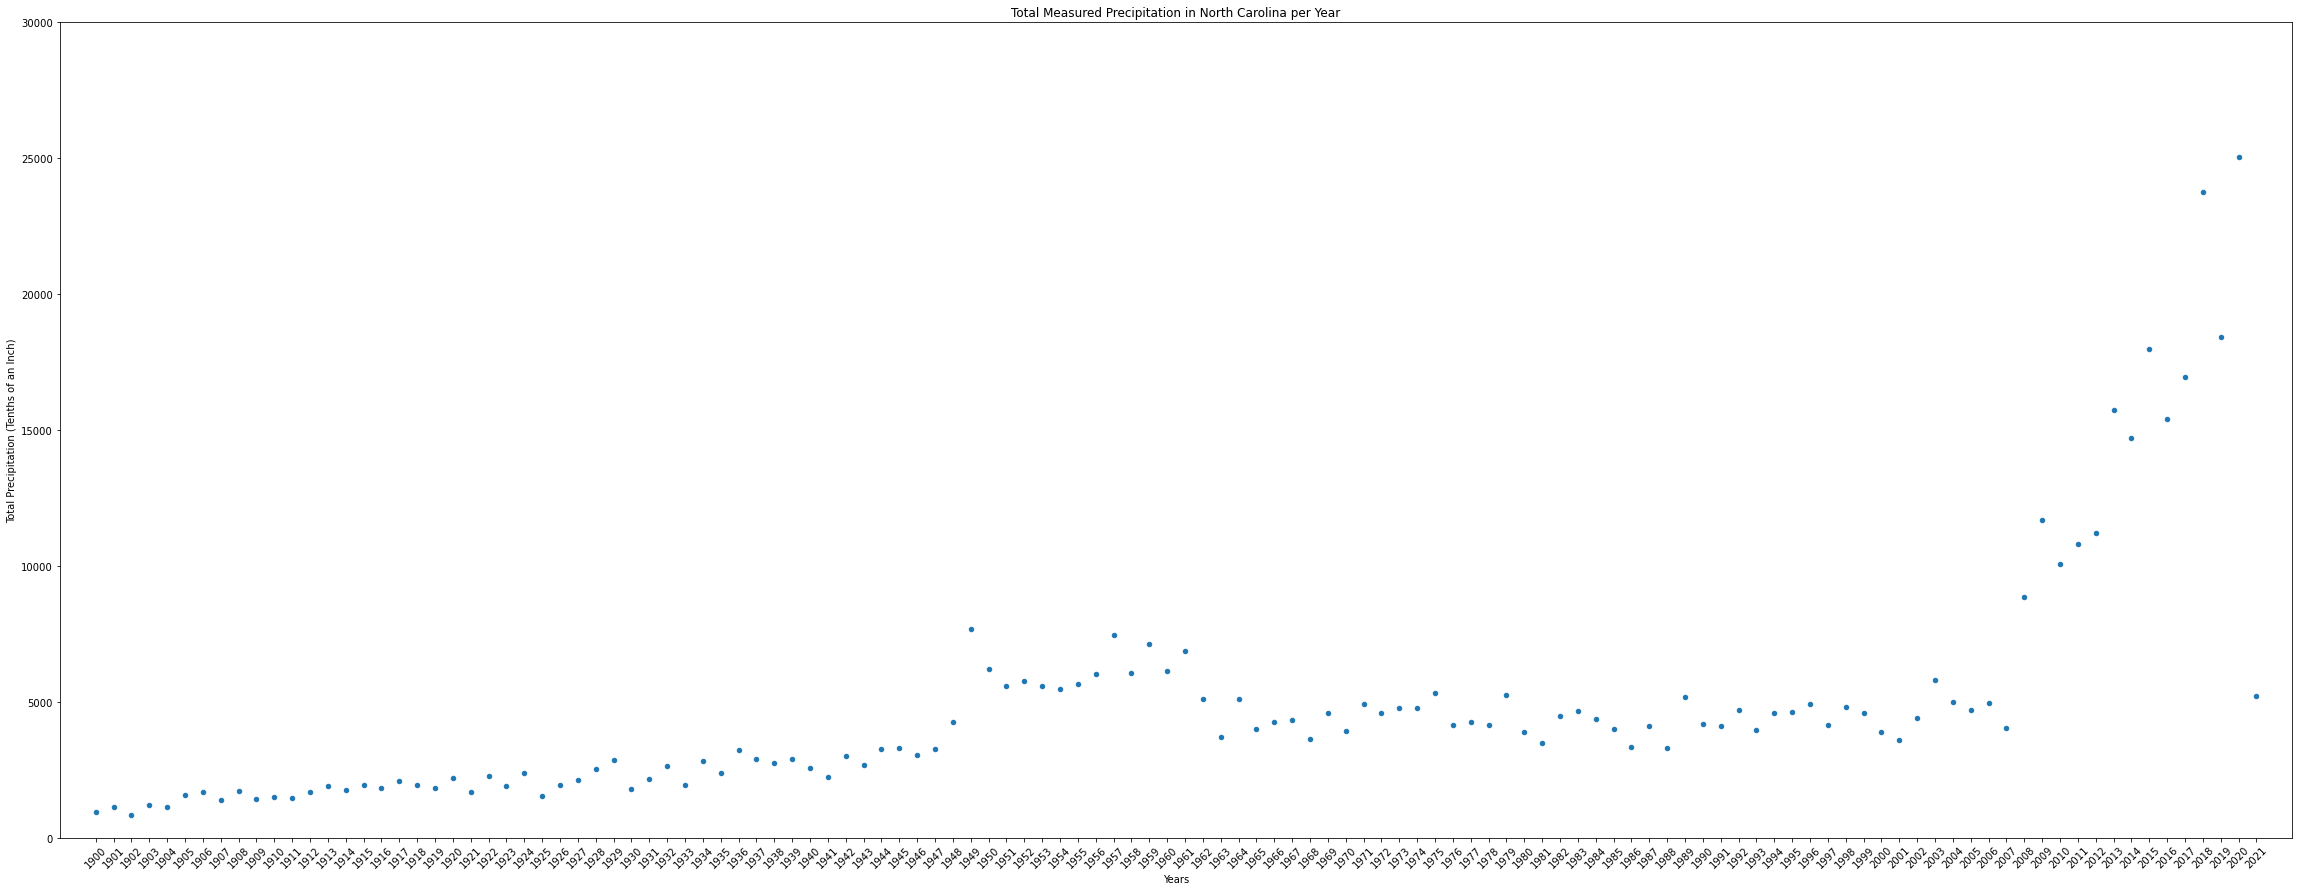

In [16]:
# Plot scatter plot

scatter_prec = sum_annual_prec_df.plot(kind="scatter", x="YEAR", y="PRCP", figsize = (40,15))

plt.title("Total Measured Precipitation in North Carolina per Year")

scatter_prec.set_xticklabels(sum_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.xlim(-2, 123)

plt.ylim(0,30000)

plt.show()

In [17]:
# Reference

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,YEAR
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0",1949
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0",1949
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0",1949
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0",1949
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0",1949
...,...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N",2020
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N",2020
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N",2021
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N",2021


In [18]:
# Isolate data from locations within NC

raw_prec_by_year_df = raw_prec_df.set_index("YEAR")

raw_prec_by_year_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
YEAR,,,,,,,,
1949,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-01,2.50,"1,,,0"
1949,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-02,3.16,",,,0"
1949,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-03,3.23,",,,0"
1949,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-04,4.11,",,,0"
1949,USC00312270,"DAYBOOK, NC US",35.98333,-82.30000,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
2020,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N"
2020,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N"
2021,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N"


In [19]:
# Determine locations with data going back to 1900

raw_prec_by_year_df.loc["1900", "NAME"].unique()

array(['HIGHLANDS, NC US', 'GREENVILLE, NC US', 'CHARLOTTE, NC US',
       'KINSTON 7 SE, NC US', 'SUNBEAM, VA US', 'CHAPEL HILL 2 W, NC US',
       'PATTERSON, NC US', 'MOUNT AIRY 2 W, NC US',
       'SOUTHERN PINES 2 W, NC US', 'GREENSBORO, NC US', 'SETTLE, NC US',
       'MONCURE 3 SE, NC US', 'BRYSON CITY 2, NC US', 'LOUISBURG, NC US',
       'WAYNESVILLE 1 E, NC US', 'WINSTON SALEM REYNOLDS AIRPORT, NC US',
       'HENDERSON 2 NNW, NC US', 'EDENTON, NC US', 'SELMA, NC US',
       'MORGANTON, NC US', 'FAYETTEVILLE PWC, NC US', 'SLOAN 3 S, NC US',
       'ASHEVILLE, NC US', 'PITTSBORO, NC US'], dtype=object)

In [20]:
# Isolate data from selected locations: 'GREENVILLE, NC US', 'CHARLOTTE, NC US', 'CHAPEL HILL 2 W, NC US'

raw_prec_by_loc_df = raw_prec_df.set_index("NAME")

In [21]:
# Greenville data

greenville_prec_df = raw_prec_by_loc_df.loc["GREENVILLE, NC US", :]

greenville_groupby_year = greenville_prec_df.groupby("YEAR")

greenville_avg_prec = greenville_groupby_year["PRCP"].mean()

greenville_avg_prec_df = pd.DataFrame(greenville_avg_prec)

greenville_avg_prec_df = greenville_avg_prec_df.reset_index()

greenville_avg_prec_df

,YEAR,PRCP
0,1900,4.565000
1,1913,4.238000
2,1914,3.553333
3,1915,3.320000
4,1916,4.328333
...,...,...
98,2017,4.210833
99,2018,5.535000
100,2019,4.120000
101,2020,5.097500


0.22709504342020329


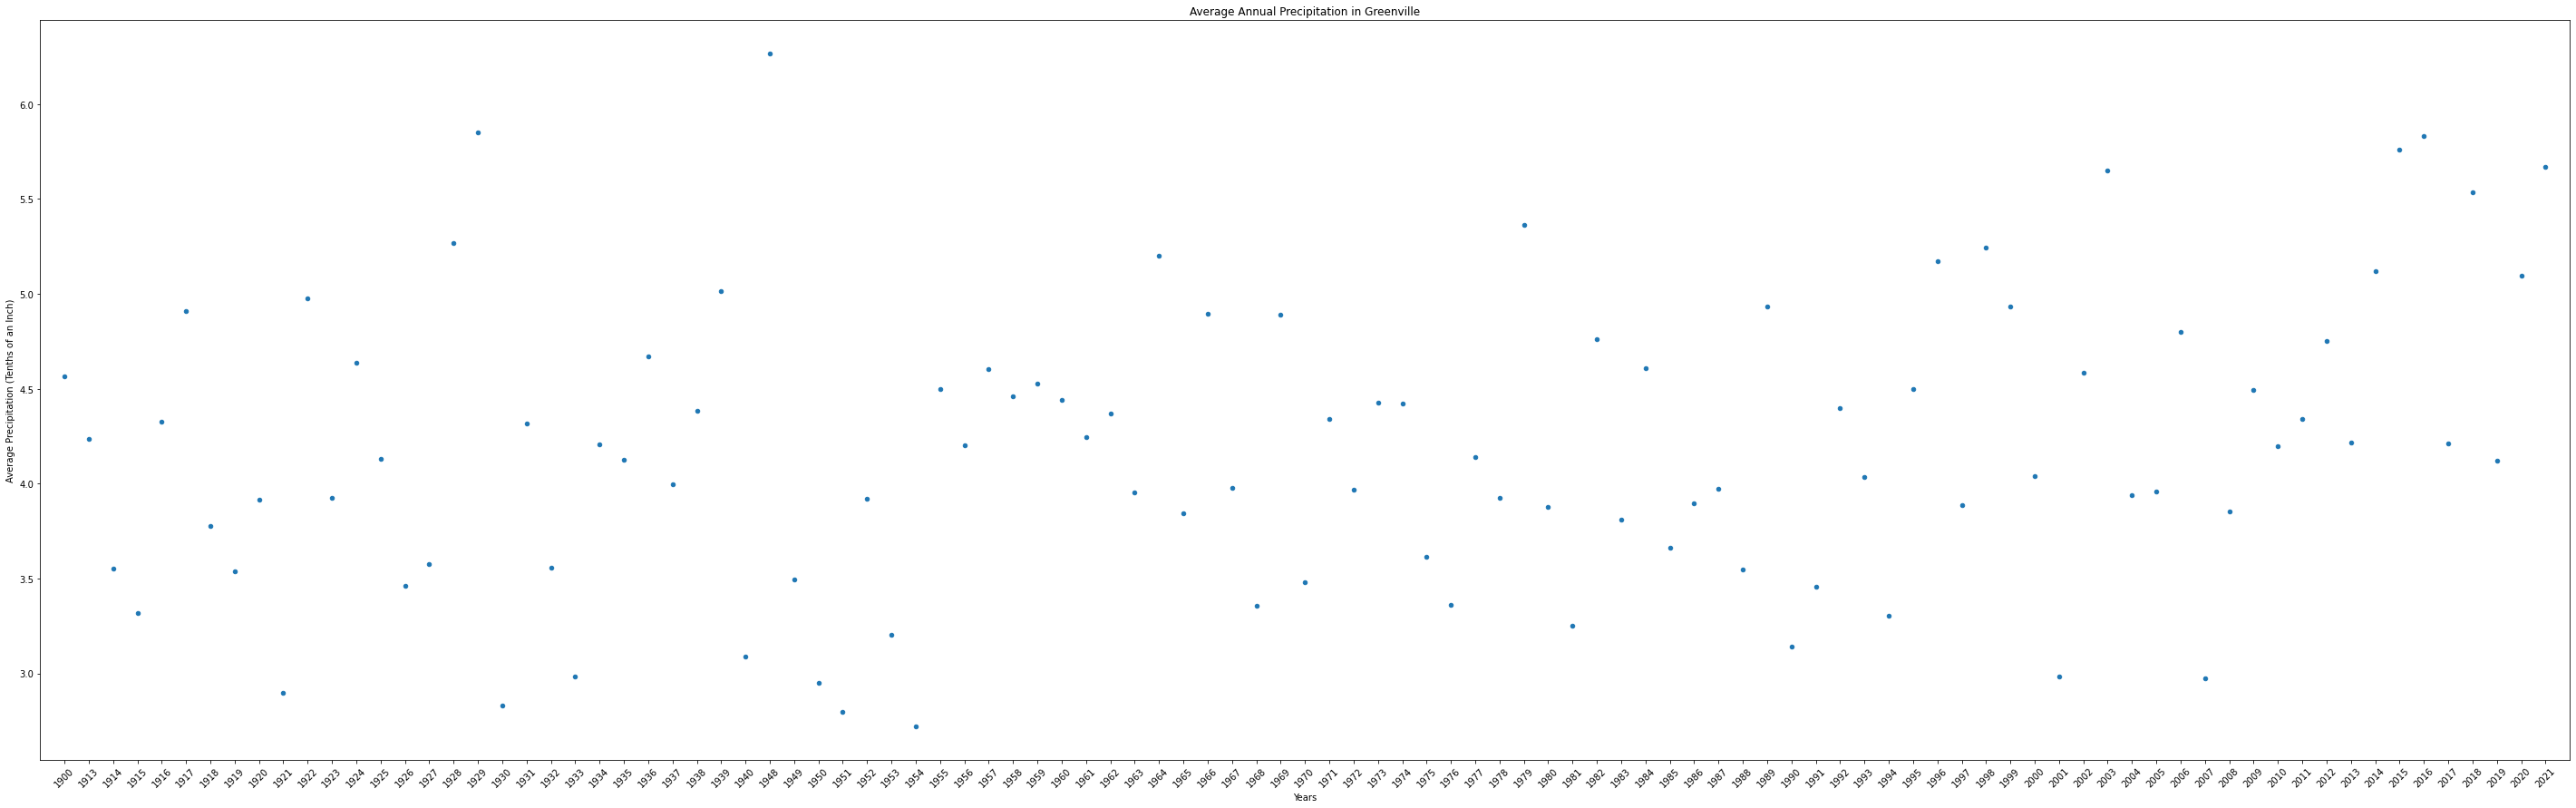

In [26]:
# Greenville plot

greenville_scatter = greenville_avg_prec_df.plot(kind="scatter", x="YEAR", y="PRCP", figsize = (50,15), legend=False)

greenville_scatter.set_xticklabels(greenville_avg_prec_df["YEAR"], rotation = 45)

plt.title("Average Annual Precipitation in Greenville")

plt.xlabel('Years')

plt.ylabel("Average Precipitation (Tenths of an Inch)")

plt.xlim(-1, 103)

# Calculate correlation coefficient

gville_years = greenville_avg_prec_df["YEAR"]
gville_years = gville_years.astype(float)

gville_avg_prec = greenville_avg_prec_df["PRCP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(gville_years, gville_avg_prec)

print(f"Pearson's Correlation Coefficient: {rvalue}")

#gville_correlation = sts.pearsonr(gville_years,gville_avg_prec)

# Determine linear regression equation and line for chart

#(slope, intercept, rvalue, pvalue, stderr) = linregress(gville_years, gville_avg_prec)

(0.22709504342020334, 0.021062489412775488)